# Linear feedback: continuous-time full state feedback

In [1]:
import control as ct
import matplotlib.pyplot as plt
# %matplotlib qt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
import scipy as sp
np.set_printoptions(precision=2)

from sys.ct_platoon import CTPlatoon
from utils.graphs import kpf_graph
from utils.plotting import plot_traj, plot_errors

## Using ct_sys module

In [2]:
n = 3
N = 5
tau = 0.5
dt = 0.1
t0 = 0.
tf = 10.
td1 = 1.
td2 = 2.
a0 = 2.
v0 = 20.
d_des = 5

Q = np.diag([0., 1, 1, 1])
R = np.diag([.1])

M, D, L, P = kpf_graph(N, k=1)

use_integrator = False
if use_integrator:
    Q[0, 0] = 0.1

plat = CTPlatoon(tau, M, P, Q, R, use_integrator)
T, traj, inputs, pred_errors, lead_errors = plat.sim_sys(dt, t0, tf, a0, td1, td2, v0, d_des)
traj_w_inputs = [np.vstack((traj[i], inputs[i].reshape((1, -1)))) 
                 for i in range(N+1)]

(4, 4) (4, 4)


In [3]:
print(f"max predecessor error: {max(abs(pred_errors[-1][0, :]))}")
print(f"max input acceleration: {max(abs(inputs[-1]))}")
max_jerk = max([max(abs(lead_errors[i][n-2, 1:] - lead_errors[i][n-1, :-1])) for i in range(0, N)])
print(f"max jerk: {max_jerk}")

max predecessor error: 0.28356504037822106
max input acceleration: 2.666243434318639
max jerk: 2.7407620138728896


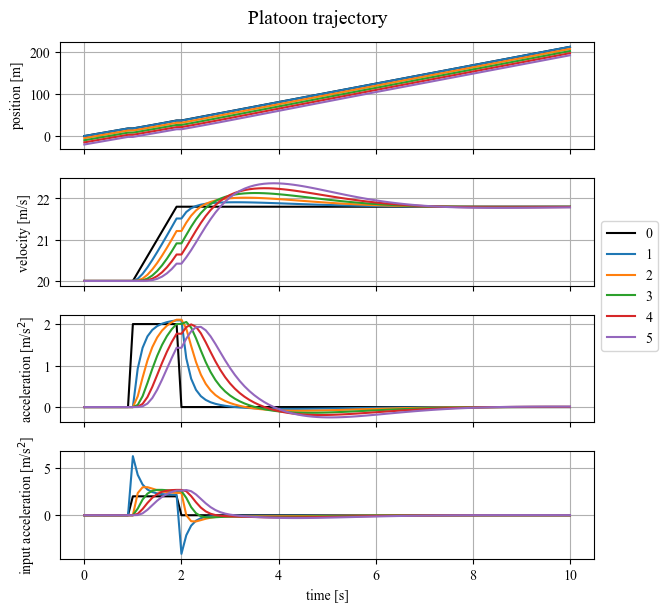

In [4]:
plot_inds = range(N+1)
plot_traj(T, traj_w_inputs, labels=plot_inds)

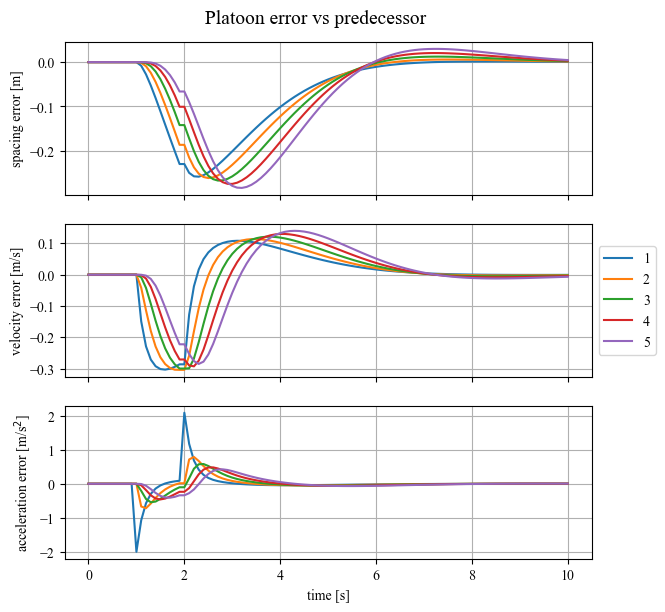

In [5]:
labels = np.arange(1, N+1)
plot_pred_errors = [pred_errors[l-1] for l in labels]
plot_errors(T, plot_pred_errors, "Platoon error vs predecessor", labels)

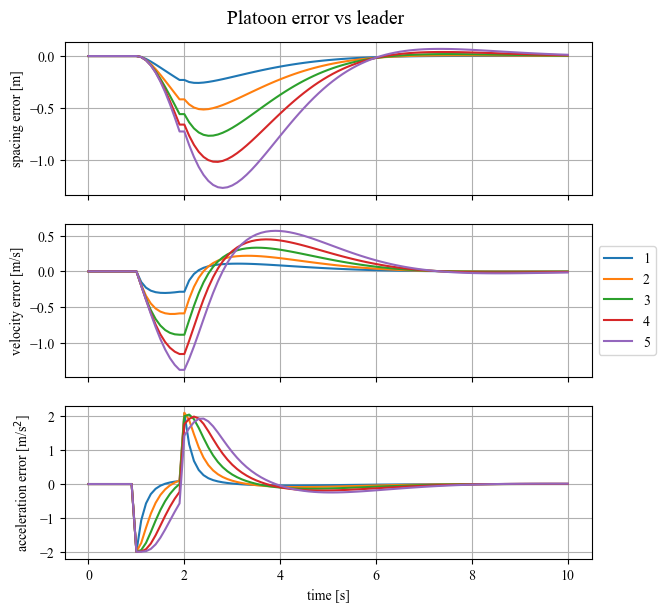

In [6]:
labels = np.arange(1, N+1)
plot_lead_errors = [lead_errors[l-1] for l in labels]
plot_errors(T, plot_lead_errors, "Platoon error vs leader", labels)